In [7]:
import cv2
import numpy as np
import os 
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [8]:
new_model = tf.keras.models.load_model('classifier')

cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)
font = cv2.FONT_HERSHEY_SIMPLEX

id = 0
names = ["imposter", "valid user"]
# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)
cv2.startWindowThread()

cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height
# Define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)
while True:
    ret, img =cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (int(minW), int(minH)),
       )
    for(x,y,w,h) in faces:
        face = cv2.resize(img[y:y+h,x:x+w], dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
        face_img = Image.fromarray(face, 'RGB')
        Y = image.img_to_array(face_img)
        X = np.expand_dims(Y, axis=0)
        id = new_model.predict(X)
        
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)        

        if (id == 1):
            id = "valid user"
        else:
            id = "imposter"
        
        cv2.putText(
                    img, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    img, 
                    str(id), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )  
    
    cv2.imshow('camera',img) 
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

1/1 [==============================] - 0s 25ms/step


KeyboardInterrupt: 

: 

In [ ]:
# face = tf.keras.utils.array_to_img(
#             gray[y:y+h,x:x+w], data_format=None, scale=True, dtype=None
#         )
# img = Image.fromarray(face, 'L')

ValueError: Expected image array to have rank 3 (single image). Got array with shape: (190, 190)

In [ ]:
# print(face_img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x7FE64D8BA920>


1/1 [==============================] - 1s 512ms/step


array([[0.]], dtype=float32)

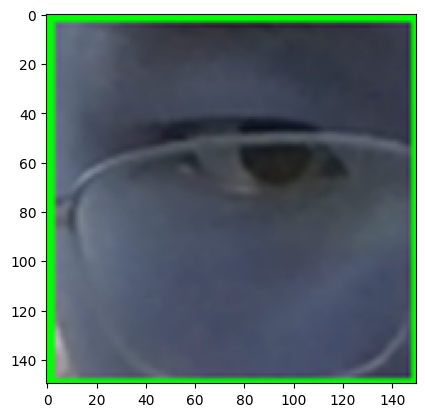

: 

In [ ]:

# plt.imshow(face_img)
# Y = image.img_to_array(face_img)
# X = np.expand_dims(Y, axis=0)
# new_model.predict(X)